# **Universidad Galileo**
# **Postgrado en Análisis y Predicción de Datos** - *Segundo Trimestre 2024*
# **Statistical Learning I**
# **Alumno:** Elder Cruz. **Carnet:** 23004456
# **Alumno:** Walter Reyes. **Carnet:** 23004450
# **Proyecto final:** Fase 2-Notebook 3


### Para este notebook, se presenta el desarrollo de los algoritmos de clasificación para comparar el rendimiento de cada algoritmo y la evaluación distintos hiper-parámetros de cada modelo.

#### Para el proyecto final del curso se ha elegido un dataset de una cartera crediticia de una entidad financiera con el fin de analizar sus variables relacionadas con la rentabilidad de cada segmento comercial existente el cual se espera sea la variable Target para posterior crear un modelo relacionado con la rentabilidad por cliente, segmento o producto.

# 1. Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Carga de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_path ='/content/drive/MyDrive/Proyecto_Final_SL/df_loans_FS.csv'

In [4]:
df_Loans = pd.read_csv(dataset_path, delimiter = ",")
df_Loans.head()

,Desembolso,Vencimiento,Saldo$,FechaReporte,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
0,2022-08-02,2037-04-30,3724668.653,2024-04-30,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,...,-383.346851,-383.346851,0.000037,0.013661,0.716564,0.922326,0.305537,0.363972,0.990139,0.549219
1,2022-09-12,2039-02-28,2902574.199,2024-04-30,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,...,-383.346851,-383.346851,0.000066,0.018281,0.558406,0.935660,0.316221,0.283423,1.000000,0.626605
2,2023-10-23,2026-05-25,2573399.796,2024-04-30,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,...,-430.005105,-430.005105,0.000031,0.012580,0.495079,0.842738,0.316221,0.250502,0.506621,0.087334
3,2023-07-17,2028-07-17,2272312.020,2024-04-30,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,...,-410.247980,-410.247980,0.000100,0.022490,0.437155,0.858364,0.337589,0.221193,0.119585,0.178022
4,2023-11-23,2026-05-25,1707450.764,2024-04-30,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,...,-430.005105,-430.005105,0.000031,0.012607,0.328485,0.842738,0.316221,0.143481,0.336143,0.087334


# 3. EDA - Exploratory Analysis

In [5]:
df_Loans.columns

Index(['Desembolso', 'Vencimiento', 'Saldo$', 'FechaReporte', 'PE_30.04.2024',
       'PD_MAX_2024_04_30', 'LGD_MAX_2024_04_30', 'PlazoRestante(Dias)',
       'Reserva Especifica$', 'Ab_24', 'Tasa_Propuesta', 'bps%',
       'IntAnual_TasaPropuesta', 'Tasa_Costo_Oportunidad', 'FTP', 'TIR',
       'Código Moneda', 'Status Mora', 'SegmentoComercial', 'Nuevo',
       'Brecha_encoded', 'Saldo$_capp', 'PE_30.04.2024_capp',
       'PD_MAX_2024_04_30_capp', 'PlazoRestante(Dias)_capp',
       'Reserva Especifica$_capp', 'Ab_24_capp', 'Tasa_Propuesta_capp',
       'IntAnual_TasaPropuesta_capp', 'FTP_capp', 'TIR_capp',
       'Saldo$_capp_cuad', 'PE_30.04.2024_capp_cuad',
       'PlazoRestante(Dias)_capp_cuad', 'Reserva Especifica$_capp_cuad',
       'Tasa_Propuesta_capp_cuad', 'IntAnual_TasaPropuesta_capp_cuad',
       'FTP_capp_cuad', 'FTP_capp_log', 'FTP_capp_inv', 'FTP_capp_BC',
       'FTP_capp_YJ', 'TIR_capp_cuad', 'TIR_capp_cuad_minMaxScaled',
       'Saldo$_capp_cuad_minMaxScaled', 'FTP_c

In [6]:
df_Loans.shape

(2819, 50)

In [7]:
df = df_Loans.drop(columns=['Desembolso','Vencimiento','FechaReporte'])

df.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
0,3724668.653,99427.84220,0.075018,0.3500,4748,72351.20216,0.0750,0.0775,0.0025,288661.8206,...,-383.346851,-383.346851,0.000037,0.013661,0.716564,0.922326,0.305537,0.363972,0.990139,0.549219
1,2902574.199,100418.02520,0.097223,0.3500,5417,56339.50477,0.0775,0.0800,0.0025,232205.9359,...,-383.346851,-383.346851,0.000066,0.018281,0.558406,0.935660,0.316221,0.283423,1.000000,0.626605
2,2573399.796,50873.84772,0.097223,0.2000,755,49795.28605,0.0750,0.0800,0.0050,205871.9837,...,-430.005105,-430.005105,0.000031,0.012580,0.495079,0.842738,0.316221,0.250502,0.506621,0.087334
3,2272312.020,12008.44648,0.014032,0.3796,1539,43969.23758,0.0850,0.0850,0.0000,193146.5217,...,-410.247980,-410.247980,0.000100,0.022490,0.437155,0.858364,0.337589,0.221193,0.119585,0.178022
4,1707450.764,33754.79796,0.097223,0.2000,755,28521.49497,0.0750,0.0800,0.0050,136596.0612,...,-430.005105,-430.005105,0.000031,0.012607,0.328485,0.842738,0.316221,0.143481,0.336143,0.087334


In [8]:
df['SegmentoComercial'].value_counts(normalize=True)

#Recordando los segmentos:
#{0: '1_INMOBILIARIA', 1: '2_NEGOCIO', 2: '3_COMERCIAL', 3: '4_RETAIL', 4: '5_INTERCOMPANY'}

SegmentoComercial
3    0.853849
1    0.061369
0    0.047535
2    0.034409
4    0.002838
Name: proportion, dtype: float64

# 4. Balanceo de clases en target

In [9]:
dataPositiva = df[df['SegmentoComercial'] == 0]
dataPositiva.shape

(134, 47)

In [10]:
dataNegativa = df[df['SegmentoComercial'] == 3]
dataNegativa.shape

(2407, 47)

In [11]:
n = 2*dataPositiva.shape[0]
dataNegativa = dataNegativa.sample(n, random_state=2024, replace = False)

dataNegativa.shape

(268, 47)

In [12]:
completeData = pd.concat([dataPositiva,dataNegativa])
completeData = completeData.sample(len(completeData), replace = False, random_state = 2025) #shuffle - mezclar datos aleatoriamente

completeData.shape

(402, 47)

In [13]:
completeData['SegmentoComercial'].value_counts(normalize=True)

SegmentoComercial
3    0.666667
0    0.333333
Name: proportion, dtype: float64

In [14]:
def encode_target(value):
    if(value == 0):
        return 1
    else:
        return 0

In [15]:
completeData['SegmentoComercial'] = completeData['SegmentoComercial'].map(encode_target)
completeData.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
127,52367.078750,246.190823,0.008579,0.5500,610,1688.385732,0.0800,0.0850,0.0050,4451.201694,...,-433.800491,-433.800491,0.000091,0.021482,0.010075,0.839848,0.337589,0.008494,0.002452,0.070561
2705,121604.140000,571.679921,0.008579,0.5500,6635,3739.146043,0.0725,0.0775,0.0050,9424.320850,...,-441.168082,-441.168082,0.000096,0.022090,0.023395,0.834335,0.305537,0.018810,0.005693,0.767496
88,2506.245641,0.000000,0.005313,0.3000,214,29.080704,0.1150,0.1150,0.0000,288.218249,...,-444.401109,-444.401109,0.001275,0.080480,0.000482,0.831955,0.465798,0.000146,0.000000,0.024754
2692,274999.570000,3607.025497,0.035232,0.3796,426,5334.818614,0.0800,0.0900,0.0100,24749.961300,...,-475.174126,-475.174126,0.000115,0.024143,0.052905,0.727191,0.358957,0.026837,0.035920,0.049277
2702,134166.700000,252.950487,0.004982,0.3796,7000,2614.065946,0.0750,0.0775,0.0025,10397.919250,...,-432.764638,-432.764638,0.000096,0.022032,0.025811,0.840633,0.305537,0.013150,0.002519,0.809717


# 5. Construcción de Modelos

In [16]:
# modelos
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV #para hiper-parámetros

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# gestion train-test
from sklearn.model_selection import train_test_split

# transformaciones
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [17]:
completeData.head()

,Saldo$,PE_30.04.2024,PD_MAX_2024_04_30,LGD_MAX_2024_04_30,PlazoRestante(Dias),Reserva Especifica$,Ab_24,Tasa_Propuesta,bps%,IntAnual_TasaPropuesta,...,FTP_capp_BC,FTP_capp_YJ,TIR_capp_cuad,TIR_capp_cuad_minMaxScaled,Saldo$_capp_cuad_minMaxScaled,FTP_capp_cuad_minMaxScaled,Tasa_Propuesta_capp_cuad_minMaxScaled,Reserva Especifica$_capp_cuad_minMaxScaled,PE_30.04.2024_capp_cuad_minMaxScaled,PlazoRestante(Dias)_capp_cuad_minMaxScaled
127,52367.078750,246.190823,0.008579,0.5500,610,1688.385732,0.0800,0.0850,0.0050,4451.201694,...,-433.800491,-433.800491,0.000091,0.021482,0.010075,0.839848,0.337589,0.008494,0.002452,0.070561
2705,121604.140000,571.679921,0.008579,0.5500,6635,3739.146043,0.0725,0.0775,0.0050,9424.320850,...,-441.168082,-441.168082,0.000096,0.022090,0.023395,0.834335,0.305537,0.018810,0.005693,0.767496
88,2506.245641,0.000000,0.005313,0.3000,214,29.080704,0.1150,0.1150,0.0000,288.218249,...,-444.401109,-444.401109,0.001275,0.080480,0.000482,0.831955,0.465798,0.000146,0.000000,0.024754
2692,274999.570000,3607.025497,0.035232,0.3796,426,5334.818614,0.0800,0.0900,0.0100,24749.961300,...,-475.174126,-475.174126,0.000115,0.024143,0.052905,0.727191,0.358957,0.026837,0.035920,0.049277
2702,134166.700000,252.950487,0.004982,0.3796,7000,2614.065946,0.0750,0.0775,0.0025,10397.919250,...,-432.764638,-432.764638,0.000096,0.022032,0.025811,0.840633,0.305537,0.013150,0.002519,0.809717


In [18]:
# seleccionamos el target y features
X = completeData.drop('SegmentoComercial', axis = 1)
y = completeData['SegmentoComercial']

In [19]:
# split para train y test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2025,shuffle=True)

In [20]:
# creamos el scaler
scaler = MinMaxScaler()

scaler.fit(X_train) #calculamos el scaler

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.1 Naive Bayes

In [21]:
NB_Classifier = GaussianNB()
NB_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

nb_predicts = NB_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(nb_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, nb_predicts))

Roc_Auc Score: 0.9756493506493507
Accuracy: 0.9752066115702479


In [22]:
nb_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [23]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.1.1 Naive Bayes Optimización con Hyper Parámetros

In [24]:
# Crear el clasificador
nb_classifier = GaussianNB()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Configuración para la optimización de hiperparámetros
nb_hyp_opt = GridSearchCV(estimator=nb_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
nb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", nb_hyp_opt.best_params_)

Mejores hiperparámetros: {'var_smoothing': 1e-09}


In [25]:
# score del mejor modelo
nb_hyp_opt.best_score_

0.9859649122807017

In [26]:
pd.DataFrame(nb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
0,1,{'var_smoothing': 1e-09},0.985965,0.019209
1,1,{'var_smoothing': 1e-08},0.985965,0.019209
2,1,{'var_smoothing': 1e-07},0.985965,0.019209
3,1,{'var_smoothing': 1e-06},0.985965,0.019209
4,1,{'var_smoothing': 1e-05},0.985965,0.019209


## 5.2 LDA (Linear Discriminant Analysis)

In [27]:
LDA_Classifier = LinearDiscriminantAnalysis()
LDA_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

LDA_predicts = LDA_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(LDA_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, LDA_predicts))

Roc_Auc Score: 0.9871794871794871
Accuracy: 0.9834710743801653


In [28]:
LDA_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [29]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

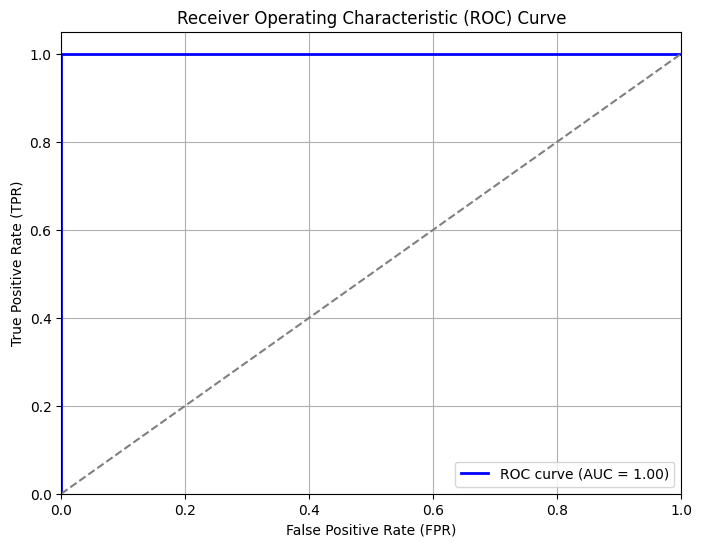

In [30]:
# Obtener las probabilidades de la clase positiva (1)
LDA_probabilities = LDA_Classifier.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, LDA_probabilities)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 5.2.1 Optimización con hiperparámetros para LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Calcular el valor máximo permitido para n_components
n_features = X_train.shape[1]
n_classes = len(set(y_train))
max_n_components = min(n_features, n_classes - 1)

# Crear el pipeline que incluya la estandarización y el clasificador LDA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

# Definir el grid de hiperparámetros
hyper_params_grid = [
    {"lda__solver": ['svd'], "lda__n_components": [None] + list(range(1, max_n_components + 1))},
    {"lda__solver": ['lsqr', 'eigen'], "lda__shrinkage": ['auto', 0.1, 0.5, 1.0], "lda__n_components": [None] + list(range(1, max_n_components + 1))}
]

# Configuración para la optimización de hiperparámetros
lda_hyp_opt = GridSearchCV(estimator=pipeline, param_grid=hyper_params_grid, cv=3, scoring="roc_auc", n_jobs=-1, error_score='raise')

try:
    # Entrenar el modelo
    lda_hyp_opt.fit(X_train, y_train)
    # Mostrar los mejores hiperparámetros
    print("Mejores hiperparámetros:", lda_hyp_opt.best_params_)
    print("Mejor puntuación AUC-ROC:", lda_hyp_opt.best_score_)
except Exception as e:
    print(f"Error durante la búsqueda de hiperparámetros: {e}")


Mejores hiperparámetros: {'lda__n_components': None, 'lda__shrinkage': 'auto', 'lda__solver': 'lsqr'}
Mejor puntuación AUC-ROC: 0.9963481800766284


In [32]:
# score del mejor modelo
lda_hyp_opt.best_score_

0.9963481800766284

In [33]:
pd.DataFrame(lda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
2,1,"{'lda__n_components': None, 'lda__shrinkage': ...",0.996348,0.003060
3,1,"{'lda__n_components': None, 'lda__shrinkage': ...",0.996348,0.003060
10,1,"{'lda__n_components': 1, 'lda__shrinkage': 'au...",0.996348,0.003060
11,1,"{'lda__n_components': 1, 'lda__shrinkage': 'au...",0.996348,0.003060
15,5,"{'lda__n_components': 1, 'lda__shrinkage': 0.5...",0.995073,0.000952
6,5,"{'lda__n_components': None, 'lda__shrinkage': ...",0.995073,0.000952
7,5,"{'lda__n_components': None, 'lda__shrinkage': ...",0.995073,0.000952
14,5,"{'lda__n_components': 1, 'lda__shrinkage': 0.5...",0.995073,0.000952
4,9,"{'lda__n_components': None, 'lda__shrinkage': ...",0.994265,0.006288
5,9,"{'lda__n_components': None, 'lda__shrinkage': ...",0.994265,0.006288


## 5.3 Regresión logística

In [34]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train) #Entrenamiento del modelo

logit_predicts = logit.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(logit_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, logit_predicts))

Roc_Auc Score: 0.9691413237924865
Accuracy: 0.9669421487603306


In [35]:
logit_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [36]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [37]:
intercept = logit.intercept_
print(f'Intercepto: {intercept}')

coefficients = logit.coef_
print(f'Coeficientes: {coefficients}')

Intercepto: [-1.8786302]
Coeficientes: [[ 2.50319981e-01  1.31374445e-01  1.68734583e-04  1.54668352e+00
   3.25435049e-01  2.34768569e-01 -7.74678847e-01 -7.02038759e-01
   6.50520501e-01  2.56336289e-01 -1.09152511e-01  1.49608060e-01
  -2.97791287e-01 -1.09152511e-01 -2.94659641e-01 -2.00620884e-01
   2.21852062e-01  3.89367576e-01 -5.50950455e-02  0.00000000e+00
   1.83918129e-01  9.21589619e-01 -8.01255808e-01 -7.52007470e-01
   3.25498712e-01  5.03867523e-02 -7.21260436e-01  6.80148195e-01
  -4.08458924e-02  6.80254228e-01  8.48775095e-01 -7.08724425e-01
   6.30510893e-01  5.79877430e-02  4.29032954e-02 -3.54836101e-02
   2.29674770e-02  2.29674770e-02 -3.51575231e-01 -2.97791287e-01
   2.50319981e-01  1.49608060e-01 -7.02038759e-01  2.34768569e-01
   1.31374445e-01  3.25435049e-01]]


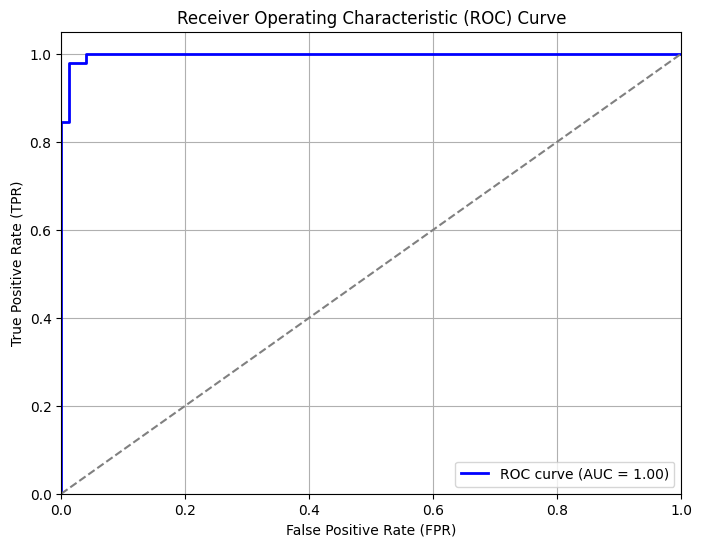

In [38]:
# Obtener las probabilidades de la clase positiva (1)
logit_probabilities = logit.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, logit_probabilities)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### 5.3.1 Optimización con hyperparámetros

In [39]:
# Crear el clasificador
lr_classifier = LogisticRegression(max_iter=1000)

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "l1_ratio": [0.1, 0.5, 0.7]  # Solo aplicable cuando penalty es 'elasticnet'
}

# Configuración para la optimización de hiperparámetros
# Asegurarse de manejar combinaciones inválidas
param_grid = [
    {"solver": ["newton-cg", "lbfgs", "sag"], "penalty": ["l2"], "C": [0.01, 0.1, 1, 10, 100]},
    {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": [0.01, 0.1, 1, 10, 100]},
    {"solver": ["saga"], "penalty": ["l1", "l2", "elasticnet"], "C": [0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.5, 0.7]},
    {"solver": ["saga"], "penalty": ["none"]}
]

# Configuración para la optimización de hiperparámetros
lr_hyp_opt = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
lr_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", lr_hyp_opt.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

Mejores hiperparámetros: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
# score del mejor modelo
lr_hyp_opt.best_score_

0.9987902046783625

In [41]:
pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
23,1,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.998790,0.002421
53,2,"{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 's...",0.998246,0.002680
54,2,"{'C': 10, 'l1_ratio': 0.1, 'penalty': 'elastic...",0.998246,0.002680
56,2,"{'C': 10, 'l1_ratio': 0.5, 'penalty': 'l2', 's...",0.998246,0.002680
9,2,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.998246,0.002680
...,...,...,...,...
28,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l1', ...",0.500000,0.000000
15,66,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.500000,0.000000
30,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elast...",0.500000,0.000000
31,66,"{'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'l1', ...",0.500000,0.000000


## 5.4 SVM

In [42]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train) #Entrenamiento del modelo

svm_predicts = svm.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(svm_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, svm_predicts))

Roc_Auc Score: 0.9691413237924865
Accuracy: 0.9669421487603306


In [43]:
svm_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [44]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [45]:
from sklearn.decomposition import PCA
# Ajustar PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entrenar el modelo SVM con los datos reducidos
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Predecir con el modelo SVM ajustado
svm_predicts = svm.predict(X_test_pca)
roc_auc = roc_auc_score(y_test, svm_predicts)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, svm_predicts))

Roc_Auc Score: 0.9600877192982455
Accuracy: 0.9669421487603306


### 5.4.1 Gráfica de regiones de predicciones

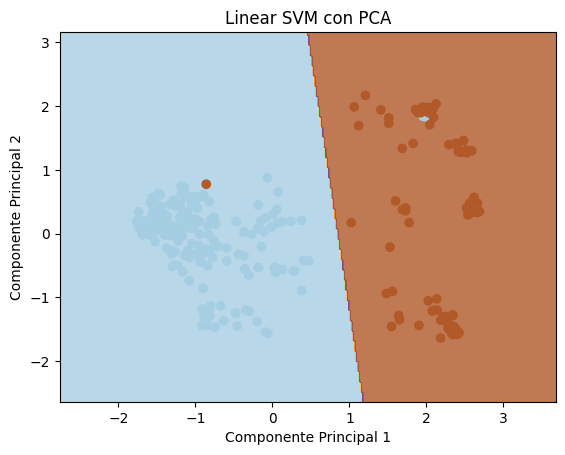

In [46]:
# Crear una malla para trazar los límites de decisión
h = 0.02  # tamaño del paso en la malla
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Trazar el límite de decisión del SVM lineal
Z_linear = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Linear SVM con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 5.4.2 Optimización de hyper-parámetros para SVM

In [47]:
# Crear el clasificador SVM con kernel lineal
svm_classifier = SVC(kernel='linear')

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "max_iter": [100, 500, 1000, 5000, -1]  # -1 significa sin límite en el número de iteraciones
}

# Configuración para la optimización de hiperparámetros
svm_hyp_opt = GridSearchCV(estimator=svm_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
svm_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", svm_hyp_opt.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-

Mejores hiperparámetros: {'C': 1, 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [48]:
# score del mejor modelo
svm_hyp_opt.best_score_

0.9970760233918128

In [49]:
pd.DataFrame(svm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
12,1,"{'C': 1, 'max_iter': 1000}",0.997076,0.004715
14,1,"{'C': 1, 'max_iter': -1}",0.997076,0.004715
13,1,"{'C': 1, 'max_iter': 5000}",0.997076,0.004715
11,1,"{'C': 1, 'max_iter': 500}",0.997076,0.004715
10,1,"{'C': 1, 'max_iter': 100}",0.997076,0.004715
22,6,"{'C': 100, 'max_iter': 1000}",0.996955,0.006290
21,6,"{'C': 100, 'max_iter': 500}",0.996955,0.006290
20,6,"{'C': 100, 'max_iter': 100}",0.996955,0.006290
23,6,"{'C': 100, 'max_iter': 5000}",0.996955,0.006290
24,6,"{'C': 100, 'max_iter': -1}",0.996955,0.006290


## 5.5 Árboles de Decisión

In [50]:
DTC_Classifier = DecisionTreeClassifier()
DTC_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

DTC_predicts = DTC_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(DTC_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, DTC_predicts))

Roc_Auc Score: 0.9871794871794871
Accuracy: 0.9834710743801653


In [51]:
DTC_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [52]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.5.1 Árboles de Decisión Optimización de Hyper-Parámetros

In [53]:
# Crear el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": [None, "sqrt", "log2"]
}

# Configuración para la optimización de hiperparámetros
dt_hyp_opt = GridSearchCV(estimator=dt_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
dt_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", dt_hyp_opt.best_params_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20}


In [54]:
# score del mejor modelo
dt_hyp_opt.best_score_

0.9988304093567251

In [55]:
pd.DataFrame(dt_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
176,1,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.998830,0.001940
12,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.997368,0.007895
3,3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.996784,0.009649
274,3,"{'criterion': 'entropy', 'max_depth': 40, 'max...",0.996784,0.009649
273,3,"{'criterion': 'entropy', 'max_depth': 40, 'max...",0.996784,0.009649
...,...,...,...,...
162,320,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.948904,0.052549
81,320,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.948904,0.049689
90,322,"{'criterion': 'gini', 'max_depth': 30, 'max_fe...",0.947661,0.055655
198,323,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.946272,0.050222


## 5.6 Random Forest Classifier

In [56]:
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

rf_predicts = RF_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(rf_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, rf_predicts))

Roc_Auc Score: 0.9756493506493507
Accuracy: 0.9752066115702479


In [57]:
rf_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [58]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.6.1 Random Forest Classifier Optimización de Hyper-Parámetros

In [59]:
rf_classifier = RandomForestClassifier()

hyper_params_grid = {
    "n_estimators": [10,50,100,500,1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10,25]
}#lista es un diccionario

#configuración para optimización de hiper parámetros

rf_hyp_opt = GridSearchCV(estimator=rf_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

#Entrenar modelo
rf_hyp_opt.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 25],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='roc_auc')

In [60]:
# score del mejor modelo
rf_hyp_opt.best_score_

0.9988304093567251

In [61]:
#mejores hyper-parametros
rf_hyp_opt.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}

In [62]:
pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
17,1,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.998830,0.003509
16,2,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.998538,0.004386
14,3,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.998246,0.003745
24,3,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.998246,0.003745
23,3,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.998246,0.003745
21,3,"{'criterion': 'entropy', 'max_depth': 10, 'n_e...",0.998246,0.003745
19,3,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.998246,0.003745
18,3,"{'criterion': 'entropy', 'max_depth': None, 'n...",0.998246,0.003745
13,3,"{'criterion': 'gini', 'max_depth': 25, 'n_esti...",0.998246,0.003745
29,3,"{'criterion': 'entropy', 'max_depth': 25, 'n_e...",0.998246,0.003745


In [63]:
#Registro del modelo
rf_model_register = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', max_depth = 25)

rf_model_register.fit(X_train_scaled, y_train)

rf_predicts = rf_model_register.predict(X_test_scaled)

roc_auc_score(rf_predicts, y_test)

0.9691413237924865

In [64]:
# le pasamos toda la data, ya no podemos revisarlo
modelo_final = RandomForestClassifier(n_estimators=100, criterion= 'entropy', max_depth= None)

X_scaled = scaler.transform(X)

modelo_final.fit(X_scaled,y)

RandomForestClassifier(criterion='entropy')

## 5.8 Análisis de discriminante cuadrático (QDA)

In [65]:
QDA_Classifier = QuadraticDiscriminantAnalysis()
QDA_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

QDA_predicts = QDA_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(QDA_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, QDA_predicts))

Roc_Auc Score: 0.9756493506493507
Accuracy: 0.9752066115702479


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [66]:
QDA_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [67]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.8.1 Optimización con hyper parámetros

In [68]:
# Crear el clasificador QDA
qda_classifier = QuadraticDiscriminantAnalysis()

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "reg_param": [0.0, 0.01, 0.1, 0.5, 1.0]
}

# Configuración para la optimización de hiperparámetros
qda_hyp_opt = GridSearchCV(estimator=qda_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
qda_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", qda_hyp_opt.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Mejores hiperparámetros: {'reg_param': 0.01}


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

In [69]:
# score del mejor modelo
qda_hyp_opt.best_score_

0.9970760233918128

In [70]:
pd.DataFrame(qda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
1,1,{'reg_param': 0.01},0.997076,0.004715
2,2,{'reg_param': 0.1},0.995906,0.007420
3,2,{'reg_param': 0.5},0.995906,0.007420
4,4,{'reg_param': 1.0},0.995322,0.007304
0,5,{'reg_param': 0.0},0.985380,0.028319


## 5.9 AdaBoost

In [71]:
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_Classifier = AdaBoostClassifier(base_estimator, n_estimators=50, random_state=2025)
ada_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

ada_predicts = ada_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(ada_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, ada_predicts))

Roc_Auc Score: 0.9691413237924865
Accuracy: 0.9669421487603306


In [72]:
ada_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [73]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.9.1 Optimización con hyper-parámetros para Ada Boost


In [74]:
# Crear el clasificador AdaBoost con un árbol de decisión como estimador base
base_estimator = DecisionTreeClassifier()

# Crear el clasificador AdaBoost
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "n_estimators": [50, 100, 200, 500],
    "learning_rate": [0.01, 0.1, 1, 10],
    "base_estimator__max_depth": [1, 2, 3, 4, 5]  # Ajuste de hiperparámetros para el estimador base
}

# Configuración para la optimización de hiperparámetros
ada_hyp_opt = GridSearchCV(estimator=ada_classifier, param_grid=hyper_params_grid, cv=10, scoring="roc_auc")

# Entrenar el modelo
ada_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", ada_hyp_opt.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Mejores hiperparámetros: {'base_estimator__max_depth': 1, 'learning_rate': 1, 'n_estimators': 50}


In [75]:
# score del mejor modelo
ada_hyp_opt.best_score_

0.9994152046783625

In [76]:
pd.DataFrame(ada_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
30,1,"{'base_estimator__max_depth': 2, 'learning_rat...",0.999415,0.001754
8,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754
9,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754
10,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754
11,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754
...,...,...,...,...
66,76,"{'base_estimator__max_depth': 5, 'learning_rat...",0.948904,0.052549
71,76,"{'base_estimator__max_depth': 5, 'learning_rat...",0.948904,0.052549
73,76,"{'base_estimator__max_depth': 5, 'learning_rat...",0.948904,0.052549
77,76,"{'base_estimator__max_depth': 5, 'learning_rat...",0.948904,0.052549


## 5.10 Gradient Boosting

In [77]:
gbc_Classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
gbc_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

gbc_predicts = gbc_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(gbc_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, gbc_predicts))

Roc_Auc Score: 0.9871794871794871
Accuracy: 0.9834710743801653


In [78]:
gbc_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [79]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.10.1 Optimización de hiperparámetros para Gradient Boosting

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Crear el pipeline que incluya la estandarización y el clasificador Gradient Boosting
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

# Definir el espacio de búsqueda de hiperparámetros con distribuciones
param_distributions = {
    "gb__n_estimators": randint(50, 500),
    "gb__learning_rate": uniform(0.01, 1.0),
    "gb__max_depth": randint(3, 7),
    "gb__min_samples_split": randint(2, 20),
    "gb__min_samples_leaf": randint(1, 10),
    "gb__max_features": ["auto", "sqrt", "log2", None],
    "gb__subsample": uniform(0.6, 0.4)
}

# Configuración para la optimización de hiperparámetros con RandomizedSearchCV
gb_hyp_opt = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions,
                                n_iter=50, cv=3, scoring="roc_auc", random_state=42, n_jobs=-1)

# Entrenar el modelo
gb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", gb_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", gb_hyp_opt.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Mejores hiperparámetros: {'gb__learning_rate': 0.28472179299006417, 'gb__max_depth': 5, 'gb__max_features': 'auto', 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 6, 'gb__n_estimators': 480, 'gb__subsample': 0.885297914889198}
Mejor puntuación AUC-ROC: 0.9986111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [81]:
# score del mejor modelo
gb_hyp_opt.best_score_

0.9986111111111112

In [82]:
pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
23,1,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.998790,0.002421
53,2,"{'C': 10, 'l1_ratio': 0.1, 'penalty': 'l2', 's...",0.998246,0.002680
54,2,"{'C': 10, 'l1_ratio': 0.1, 'penalty': 'elastic...",0.998246,0.002680
56,2,"{'C': 10, 'l1_ratio': 0.5, 'penalty': 'l2', 's...",0.998246,0.002680
9,2,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.998246,0.002680
...,...,...,...,...
28,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l1', ...",0.500000,0.000000
15,66,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.500000,0.000000
30,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elast...",0.500000,0.000000
31,66,"{'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'l1', ...",0.500000,0.000000


## 5.11 XGBoost

In [83]:
xgb_Classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
xgb_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

xgb_predicts = xgb_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(xgb_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, xgb_predicts))

Roc_Auc Score: 0.9810126582278481
Accuracy: 0.9752066115702479


In [84]:
xgb_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [85]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.11.1 Optimización de hiperparámetros con XGBoost

In [86]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Crear el pipeline que incluya la estandarización y el clasificador XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Definir el grid de hiperparámetros
hyper_params_grid = {
    "xgb__n_estimators": [50, 100, 200],
    "xgb__learning_rate": [0.01, 0.1, 0.2],
    "xgb__max_depth": [3, 4, 5],
    "xgb__min_child_weight": [1, 3, 5],
    "xgb__gamma": [0, 0.1, 0.2],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

# Configuración para la optimización de hiperparámetros
xgb_hyp_opt = GridSearchCV(estimator=pipeline, param_grid=hyper_params_grid, cv=3, scoring="roc_auc")

# Entrenar el modelo
xgb_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", xgb_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", xgb_hyp_opt.best_score_)

Mejores hiperparámetros: {'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 50, 'xgb__subsample': 1.0}
Mejor puntuación AUC-ROC: 0.998611111111111


In [87]:
# score del mejor modelo
xgb_hyp_opt.best_score_

0.998611111111111

In [88]:
pd.DataFrame(xgb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
379,1,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",0.998611,0.001070
415,1,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",0.998611,0.001070
397,1,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",0.998611,0.001070
11,4,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",0.998524,0.001282
173,4,"{'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0...",0.998524,0.001282
...,...,...,...,...
538,964,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0...",0.994010,0.004269
520,964,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0...",0.994010,0.004269
700,964,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0...",0.994010,0.004269
664,964,"{'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0...",0.994010,0.004269


## 5.12 LGBM

In [89]:
lgbm_Classifier = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2025)
lgbm_Classifier.fit(X_train_scaled, y_train) #Entrenamiento del modelo

lgbm_predicts = lgbm_Classifier.predict(X_test_scaled) #predicciones
roc_auc = roc_auc_score(lgbm_predicts, y_test)

print("Roc_Auc Score:", roc_auc)
print("Accuracy:", accuracy_score(y_test, lgbm_predicts))

[LightGBM] [Info] Number of positive: 89, number of negative: 192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1847
[LightGBM] [Info] Number of data points in the train set: 281, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316726 -> initscore=-0.768859
[LightGBM] [Info] Start training from score -0.768859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [90]:
lgbm_predicts

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [91]:
np.array(y_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 5.12.1 Optimización de modelo LGBM con hiperparámetros

In [92]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from scipy.stats import uniform, randint

# Crear el pipeline que incluya la estandarización y el clasificador LGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier())
])

# Definir el espacio de búsqueda de hiperparámetros con distribuciones
param_distributions = {
    "lgbm__n_estimators": randint(50, 200),
    "lgbm__learning_rate": uniform(0.01, 0.2),
    "lgbm__max_depth": randint(3, 6),
    "lgbm__num_leaves": randint(31, 50),
    "lgbm__min_child_samples": randint(20, 40),
    "lgbm__subsample": uniform(0.8, 0.2),
    "lgbm__colsample_bytree": uniform(0.8, 0.2),
    "lgbm__reg_alpha": uniform(0, 0.5),
    "lgbm__reg_lambda": uniform(0, 0.5)
}

# Configuración para la optimización de hiperparámetros con RandomizedSearchCV
lgbm_hyp_opt = RandomizedSearchCV(estimator=pipeline, param_distributions=param_distributions,
                                  n_iter=50, cv=3, scoring="roc_auc", random_state=42, n_jobs=-1)

# Entrenar el modelo
lgbm_hyp_opt.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", lgbm_hyp_opt.best_params_)
print("Mejor puntuación AUC-ROC:", lgbm_hyp_opt.best_score_)

[LightGBM] [Info] Number of positive: 89, number of negative: 192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1884
[LightGBM] [Info] Number of data points in the train set: 281, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.316726 -> initscore=-0.768859
[LightGBM] [Info] Start training from score -0.768859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [93]:
# score del mejor modelo
lgbm_hyp_opt.best_score_

0.9989583333333334

In [94]:
pd.DataFrame(lgbm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
#nos mostrará un score de los mejores resultados

,rank_test_score,params,mean_test_score,std_test_score
48,1,"{'lgbm__colsample_bytree': 0.9734233214419444,...",0.998958,0.001293
14,1,"{'lgbm__colsample_bytree': 0.9760935678030516,...",0.998958,0.001125
24,3,"{'lgbm__colsample_bytree': 0.9712648583756185,...",0.998872,0.001246
41,3,"{'lgbm__colsample_bytree': 0.9959021057243018,...",0.998872,0.001416
34,3,"{'lgbm__colsample_bytree': 0.9591585338872203,...",0.998872,0.001246
31,3,"{'lgbm__colsample_bytree': 0.9872309548321563,...",0.998872,0.001416
21,3,"{'lgbm__colsample_bytree': 0.9024186116598563,...",0.998872,0.001416
13,3,"{'lgbm__colsample_bytree': 0.8278662908811751,...",0.998872,0.001091
49,3,"{'lgbm__colsample_bytree': 0.9652914932215484,...",0.998872,0.001416
3,3,"{'lgbm__colsample_bytree': 0.9947511037682919,...",0.998872,0.001416


# 6. Matriz de resultados de modelos

In [97]:
# Convertir los resultados a DataFrames
df_lgbm = pd.DataFrame(lgbm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_qda = pd.DataFrame(qda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_nb = pd.DataFrame(nb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_lr = pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_svm = pd.DataFrame(svm_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_dt = pd.DataFrame(dt_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_rf = pd.DataFrame(rf_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_ada = pd.DataFrame(ada_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_gb = pd.DataFrame(lr_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_xgb = pd.DataFrame(xgb_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]
df_lda = pd.DataFrame(lda_hyp_opt.cv_results_).sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score', 'std_test_score']]


# Añadir una columna para identificar el modelo
df_nb['model'] = 'Naive Bayes'
df_lr['model'] = 'Logistic Regression'
df_svm['model'] = 'SVM'
df_dt['model'] = 'Decision Tree'
df_rf['model'] = 'Random Forest'
df_ada['model'] = 'AdaBoost'
df_gb['model'] = 'GradientBoosting'
df_xgb['model'] = 'XGBoost'
df_lgbm['model'] = 'LGBM'
df_qda['model'] = 'QDA'
df_lda['model'] = 'LDA'

# Concatenar los resultados en un solo DataFrame
df_results = pd.concat([df_nb,df_lr, df_svm,df_dt,df_rf,df_ada,df_gb, df_xgb, df_lgbm, df_qda,df_lda], ignore_index=True)

df_results_sorted = df_results.sort_values("mean_test_score", ascending = False)

df_results_sorted

,rank_test_score,params,mean_test_score,std_test_score,model
455,1,"{'base_estimator__max_depth': 2, 'learning_rat...",0.999415,0.001754,AdaBoost
459,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754,AdaBoost
458,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754,AdaBoost
457,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754,AdaBoost
456,1,"{'base_estimator__max_depth': 1, 'learning_rat...",0.999415,0.001754,AdaBoost
...,...,...,...,...,...
73,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elast...",0.500000,0.000000,Logistic Regression
75,66,"{'C': 0.01, 'l1_ratio': 0.7, 'penalty': 'elast...",0.500000,0.000000,Logistic Regression
601,66,"{'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l1', ...",0.500000,0.000000,GradientBoosting
600,66,"{'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l1', ...",0.500000,0.000000,GradientBoosting


In [98]:
# Guardar los mejores modelos en un archivo CSV
df_results_sorted.to_csv('df_results_sorted.csv', index=False)

# O guardar los mejores modelos en un archivo Excel
df_results_sorted.to_excel('df_results_sorted.xlsx', index=False)